In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path

plt.style.use('fivethirtyeight')

In [2]:
#import data and label keys

diabetes_path = 'dataset_diabetes/diabetic_data.csv'
dbd = pd.read_csv(diabetes_path)

key_path = 'dataset_diabetes/IDs_mapping.csv'
key = pd.read_csv(key_path)




First, we check the shape, feature types, and look at the dataframe at a high level



In [3]:
dbd.shape 

(101766, 50)

In [4]:
dbd.dtypes 

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [5]:
#inspect data in each columns
dbd.head(15)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


It looks like the weight column has a lot of missing values, so we inspect further using .describe() and value_counts

In [6]:
dbd.describe(include = 'all')
dbd.loc[:,'weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

A heavy majority of the weight column values are missing, so we're going to drop it from the dataframe

In [7]:
dbd.drop('weight', axis =1, inplace=True)

In [8]:
dbd.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Now we inspect other columns for missing values or values with '?' value

In [9]:
for column in dbd:
    print(dbd.loc[:, column].value_counts(dropna = False))

96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
2674482      1
281345844    1
193616274    1
355508024    1
165973818    1
125278944    1
420873188    1
157241154    1
161161032    1
174855390    1
134950734    1
154128210    1
96993108     1
122064144    1
297770840    1
382612616    1
165134172    1
108244830    1
210578766    1
443842340    1
151469730    1
289146210    1
154590960    1
145948404    1
176328594    1
            ..
249722520    1
111830682    1
126506652    1
80193186     1
186881700    1
147162726    1
263120844    1
249665124    1
151295556    1
113303472    1
73909806     1
422050106    1
13655088     1
168523320    1
296140568    1
98784828     1
157333056    1
280536642    1
130655706    1
190162530    1
107017800    1
103828530    1
176744010    1
172279374    1
297285200    1
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, Length: 101766, dtype: int64
88785891     40
43140906     28
2319

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64
No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64
No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64
No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64
No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64
No        101765
Steady         1
Name: acetohexamide, dtype: int64
No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64
No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64
No        101743
Steady        23
Name: tolbutamide, dtype: int64
No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64
No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dty

It looks like the payer_code and medical_specialty have over half of their values missing, so we will drop those features as well. Additionally, we will drop the encounter_id and patient_nbr, since they are arbitrary IDs.

In [90]:
dbd.drop('payer_code', axis =1, inplace=True)
dbd.drop('medical_specialty', axis =1, inplace=True)
dbd.drop('encounter_id', axis =1, inplace = True)
dbd.drop('patient_nbr', axis =1, inplace = True)
dbd.drop('diag_1', axis =1, inplace = True)
dbd.drop('diag_2', axis =1, inplace = True)
dbd.drop('diag_3', axis =1, inplace = True)
dbd.drop('A1Cresult', axis =1, inplace = True)
dbd.drop('max_glu_serum', axis =1, inplace = True)

KeyError: "labels ['payer_code'] not contained in axis"

Because age is represented in ranges, we're going to need dummy variables for each age group

In [11]:
dbd.head(10)
age_dummies = pd.get_dummies(dbd, columns=["age"])
age_dummies.head()

dbd = age_dummies
dbd.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,Caucasian,Female,6,25,1,1,41,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,1,1,7,3,59,0,18,0,...,0,1,0,0,0,0,0,0,0,0
2,AfricanAmerican,Female,1,1,7,2,11,5,13,2,...,0,0,1,0,0,0,0,0,0,0
3,Caucasian,Male,1,1,7,2,44,1,16,0,...,0,0,0,1,0,0,0,0,0,0
4,Caucasian,Male,1,1,7,1,51,0,8,0,...,0,0,0,0,1,0,0,0,0,0


Drop first Age Dummy Column to remove redudancy

In [12]:
dbd.drop("age_[0-10)", axis = 1, inplace=True)

It looks like some of the columns have values that are keys to represent discrete data, so we're going to inspect the 'key' file now

In [13]:
#visualize the key file
key.head(40)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [14]:
dbd.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,readmitted,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,Caucasian,Female,6,25,1,1,41,0,1,0,...,NO,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,1,1,7,3,59,0,18,0,...,>30,1,0,0,0,0,0,0,0,0
2,AfricanAmerican,Female,1,1,7,2,11,5,13,2,...,NO,0,1,0,0,0,0,0,0,0
3,Caucasian,Male,1,1,7,2,44,1,16,0,...,NO,0,0,1,0,0,0,0,0,0
4,Caucasian,Male,1,1,7,1,51,0,8,0,...,NO,0,0,0,1,0,0,0,0,0


It looks like admission_type_id, discharge_disposition_id, and admission_source_id, have values that need to be mapped, so we will do that next. Since the IDs aren't ordinal, we're going to have to create dummy variables once we map the features.


We will start with admin ID

In [15]:
admin_id = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: None,
    6: None,
    7: 'Trauma',
    8: None
} 
dbd.loc[:,'admission_type_id'] = dbd.loc[:,'admission_type_id'].map(admin_id)
dbd.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,readmitted,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,Caucasian,Female,None,25,1,1,41,0,1,0,...,NO,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,Emergency,1,7,3,59,0,18,0,...,>30,1,0,0,0,0,0,0,0,0
2,AfricanAmerican,Female,Emergency,1,7,2,11,5,13,2,...,NO,0,1,0,0,0,0,0,0,0
3,Caucasian,Male,Emergency,1,7,2,44,1,16,0,...,NO,0,0,1,0,0,0,0,0,0
4,Caucasian,Male,Emergency,1,7,1,51,0,8,0,...,NO,0,0,0,1,0,0,0,0,0


In [16]:
#check for null values

dbd.loc[:, 'admission_type_id'].value_counts(dropna = False)

#it looks like there are enough values to keep this feature

Emergency    53990
Elective     18869
Urgent       18480
NaN          10396
Trauma          21
Newborn         10
Name: admission_type_id, dtype: int64


Next, we map discharge_disposition_id


In [17]:
#Next we map discharge_disposition_id
dd_id = {
    1: 'Discharged to home',
    2: 'Discharged/transferred to another short term hospital',
    3: 'Discharged/transferred to SNF',
    4: 'Discharged/transferred to ICF',
    5: 'Discharged/transferred to another type of inpatient care institution',
    6: 'Discharged/transferred to home with home health service',
    7: 'Left AMA',
    8: 'Discharged/transferred to home under care of Home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'Neonate discharged to another hospital for neonatal aftercare',
    11: 'Expired',
    12: 'Still patient or expected to return for outpatient services',
    13: 'Hospice / home',
    14: 'Hospice / medical facility',
    15: 'Discharged/transferred within this institution to Medicare approved swing bed',
    16: 'Discharged/transferred/referred another institution for outpatient services',
    17: 'Discharged/transferred/referred to this institution for outpatient services',
    18: None,
    19: 'Expired at home. Medicaid only, hospice.',
    20: 'Expired in a medical facility. Medicaid only, hospice.',
    21: 'Expired, place unknown. Medicaid only, hospice.',
    22: 'Discharged/transferred to another rehab fac including rehab units of a hospital',
    23: 'Discharged/transferred to a long term care hospital.',
    24: 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
    25: None,
    26: None,
    30: 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
    27: 'Discharged/transferred to a federal health care facility.',
    28: 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    29: 'Discharged/transferred to a Critical Access Hospital (CAH).'
}

In [18]:
dbd.loc[:,'discharge_disposition_id'] = dbd.loc[:,'discharge_disposition_id'].map(dd_id)

In [19]:
#check for missing values

dbd.loc[:,'discharge_disposition_id'].value_counts(dropna= False)

#It looks like there are enough values to keep this feature

Discharged to home                                                                                           60234
Discharged/transferred to SNF                                                                                13954
Discharged/transferred to home with home health service                                                      12902
NaN                                                                                                           4680
Discharged/transferred to another short term hospital                                                         2128
Discharged/transferred to another rehab fac including rehab units of a hospital                               1993
Expired                                                                                                       1642
Discharged/transferred to another type of inpatient care institution                                          1184
Discharged/transferred to ICF                                                   

Finally, we map admission_source_id 

In [20]:
as_id = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from a hospital',
    5: 'Transfer from a Skilled Nursing Facility (SNF)',
    6: 'Transfer from another health care facility',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    9: None,
    10: 'Transfer from critial access hospital',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
    15: None,
    17: None,
    18: 'Transfer From Another Home Health Agency',
    19: 'Readmission to Same Home Health Agency',
    20: None,
    21: None,
    22: 'Transfer from hospital inpt/same fac reslt in a sep claim',
    23: 'Born inside this hospital',
    24: 'Born outside this hospital',
    25: 'Transfer from Ambulatory Surgery Center',
    26: 'Transfer from Hospice'
}

In [21]:
dbd.loc[:,'admission_source_id'] = dbd.loc[:,'admission_source_id'].map(as_id)
dbd.head(10)

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,readmitted,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,Caucasian,Female,None,None,Physician Referral,1,41,0,1,0,...,NO,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,Emergency,Discharged to home,Emergency Room,3,59,0,18,0,...,>30,1,0,0,0,0,0,0,0,0
2,AfricanAmerican,Female,Emergency,Discharged to home,Emergency Room,2,11,5,13,2,...,NO,0,1,0,0,0,0,0,0,0
3,Caucasian,Male,Emergency,Discharged to home,Emergency Room,2,44,1,16,0,...,NO,0,0,1,0,0,0,0,0,0
4,Caucasian,Male,Emergency,Discharged to home,Emergency Room,1,51,0,8,0,...,NO,0,0,0,1,0,0,0,0,0
5,Caucasian,Male,Urgent,Discharged to home,Clinic Referral,3,31,6,16,0,...,>30,0,0,0,0,1,0,0,0,0
6,Caucasian,Male,Elective,Discharged to home,Clinic Referral,4,70,1,21,0,...,NO,0,0,0,0,0,1,0,0,0
7,Caucasian,Male,Emergency,Discharged to home,Emergency Room,5,73,0,12,0,...,>30,0,0,0,0,0,0,1,0,0
8,Caucasian,Female,Urgent,Discharged to home,Transfer from a hospital,13,68,2,28,0,...,NO,0,0,0,0,0,0,0,1,0
9,Caucasian,Female,Elective,Discharged/transferred to SNF,Transfer from a hospital,12,33,3,18,0,...,NO,0,0,0,0,0,0,0,0,1


In [22]:
#check for missing values

dbd.loc[:, 'admission_source_id'].value_counts(dropna = False)

#it looks like there are enough values to keep this feature

Emergency Room                                               57494
Physician Referral                                           29565
NaN                                                           7067
Transfer from a hospital                                      3187
Transfer from another health care facility                    2264
Clinic Referral                                               1104
Transfer from a Skilled Nursing Facility (SNF)                 855
HMO Referral                                                   187
Court/Law Enforcement                                           16
Transfer from hospital inpt/same fac reslt in a sep claim       12
Transfer from critial access hospital                            8
Transfer from Ambulatory Surgery Center                          2
Extramural Birth                                                 2
Normal Delivery                                                  2
Sick Baby                                                     

Now that we have all of the ID columns properly mapped, we need to create dummy variables for each one

In [23]:
dbd.head(10)
id_dummies = pd.get_dummies(dbd, columns=["admission_type_id", "discharge_disposition_id", "admission_source_id"])
id_dummies.head()

dbd = id_dummies
dbd.head()

,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,admission_source_id_HMO Referral,admission_source_id_Normal Delivery,admission_source_id_Physician Referral,admission_source_id_Sick Baby,admission_source_id_Transfer from Ambulatory Surgery Center,admission_source_id_Transfer from a Skilled Nursing Facility (SNF),admission_source_id_Transfer from a hospital,admission_source_id_Transfer from another health care facility,admission_source_id_Transfer from critial access hospital,admission_source_id_Transfer from hospital inpt/same fac reslt in a sep claim
0,Caucasian,Female,1,41,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,Caucasian,Female,3,59,0,18,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
2,AfricanAmerican,Female,2,11,5,13,2,0,1,6,...,0,0,0,0,0,0,0,0,0,0
3,Caucasian,Male,2,44,1,16,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
4,Caucasian,Male,1,51,0,8,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0


Within the dataset, there are also drug columns, which indicate whether or not the patient is on a steady regiment (Steady), lowered dose (Down), higher dose (Up), or not given the drug (No).

In [24]:
drugs = ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]
dbd.loc[:, drugs]

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
2,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
4,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
5,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
6,Steady,No,No,No,Steady,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
7,No,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,No,No,No,No,No,No
8,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
9,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No


In [25]:
for drug in drugs:
    print(dbd.loc[:, drug].value_counts())


No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64
No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64
No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64
No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64
No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64
No        101765
Steady         1
Name: acetohexamide, dtype: int64
No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64
No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64
No        101743
Steady        23
Name: tolbutamide, dtype: int64
No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64
No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dty

There are several drugs that very low administration rates (< 100 times), so we can drop those

In [26]:
dbd.drop(['glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'], axis = 1, inplace = True)
dbd.head()

,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,admission_source_id_HMO Referral,admission_source_id_Normal Delivery,admission_source_id_Physician Referral,admission_source_id_Sick Baby,admission_source_id_Transfer from Ambulatory Surgery Center,admission_source_id_Transfer from a Skilled Nursing Facility (SNF),admission_source_id_Transfer from a hospital,admission_source_id_Transfer from another health care facility,admission_source_id_Transfer from critial access hospital,admission_source_id_Transfer from hospital inpt/same fac reslt in a sep claim
0,Caucasian,Female,1,41,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,Caucasian,Female,3,59,0,18,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
2,AfricanAmerican,Female,2,11,5,13,2,0,1,6,...,0,0,0,0,0,0,0,0,0,0
3,Caucasian,Male,2,44,1,16,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
4,Caucasian,Male,1,51,0,8,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0


With the remaining medications, we need to map the status to ordinal numeric values. In this case, we will use 0 for No, 1 for Down, 2 for steady, and 3 for up.

In [27]:
drugs_final = ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin"]
drugs_map = {
    'No': 0,
    'Down': 1,
    'Steady': 2,
    'Up': 3
}
for drug in drugs_final:
    dbd.loc[:,drug] = dbd.loc[:, drug].map(drugs_map)

    
dbd.loc[:, drugs_final].head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2


In [28]:
dbd.loc[:, 'diabetesMed'] = dbd.loc[:, 'diabetesMed'].map({'No': 0, 'Yes': 1}) 
dbd.loc[:, 'change'] = dbd.loc[:, 'change'].map({'No': 0, 'Yes': 1})
dbd.loc[:, 'gender'] = dbd.loc[:, 'gender'].map({'Male': 0, 'Female': 1})

In [29]:
race_dummies = pd.get_dummies(dbd, columns = ['race'])

In [30]:
dbd = race_dummies
dbd.head()
dbd.drop('race_?', axis = 1, inplace = True)

Finally, since we are predicting the "readmitted" column, we need to map that to numbers as well

In [31]:
re_status = {
    'NO': 0,
    '<30': 1,
    '>30': 2
}

dbd.loc[:, "readmitted"] = dbd.loc[:,"readmitted"].map(re_status)

In [32]:
dbd.loc[:,"readmitted"].value_counts()

0    54864
2    35545
1    11357
Name: readmitted, dtype: int64

Finally, drop the null values and visualize data

In [33]:
dbd.dropna(inplace= True)

In [34]:
dbd.shape

(54754, 87)

After dropping null values, it looks like we still have over 80% of our data. So we can continue.

Now we can visualize the numeric features using histograms

In [35]:
numeric_features = dbd.loc[:, ['num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']]

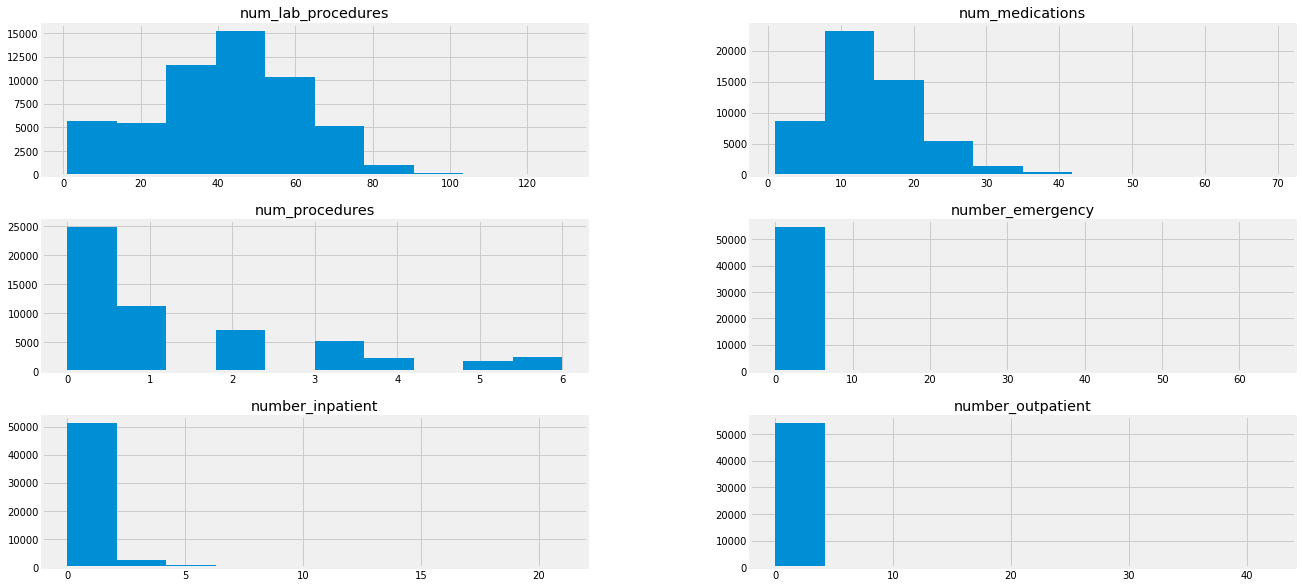

In [36]:
ax = numeric_features.hist(figsize=(20, 10))

For this analysis, we will be implementing a random forest classifier, to determine whether or not a given patient will be readmitted within 30 days, after 30 days, or not at all.

First, we split the dataframe into features columns and classification column

In [37]:
dbd.columns

Index(['gender', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'change', 'diabetesMed',
       'readmitted', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)',
       'age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)',
       'age_[80-90)', 'age_[90-100)', 'admission_type_id_Elective',
       'admission_type_id_Emergency', 'admission_type_id_Newborn',
       'admission_type_id_Trauma', 'admission_type_id_Urgent',
       'discharge_disposition_id_Admitted as an inpatient to this hospital',
       'discharge_disposition_id_Discharged to home',
       'discharge_disposition_id_Dis

In [38]:
features = ['gender', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient',
       'number_diagnoses', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin', 'change',
       'diabetesMed', 'age_[10-20)', 'age_[20-30)',
       'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)',
       'age_[70-80)', 'age_[80-90)', 'age_[90-100)',
       'admission_type_id_Elective', 'admission_type_id_Emergency',
       'admission_type_id_Newborn', 'admission_type_id_Trauma',
       'admission_type_id_Urgent',
       'discharge_disposition_id_Admitted as an inpatient to this hospital',
       'discharge_disposition_id_Discharged to home',
       'discharge_disposition_id_Discharged/transferred to ICF',
       'discharge_disposition_id_Discharged/transferred to SNF',
       'discharge_disposition_id_Discharged/transferred to a federal health care facility.',
       'discharge_disposition_id_Discharged/transferred to a long term care hospital.',
       'discharge_disposition_id_Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
       'discharge_disposition_id_Discharged/transferred to another rehab fac including rehab units of a hospital',
       'discharge_disposition_id_Discharged/transferred to another short term hospital',
       'discharge_disposition_id_Discharged/transferred to another type of inpatient care institution',
       'discharge_disposition_id_Discharged/transferred to home under care of Home IV provider',
       'discharge_disposition_id_Discharged/transferred to home with home health service',
       'discharge_disposition_id_Discharged/transferred within this institution to Medicare approved swing bed',
       'discharge_disposition_id_Discharged/transferred/referred another institution for outpatient services',
       'discharge_disposition_id_Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
       'discharge_disposition_id_Discharged/transferred/referred to this institution for outpatient services',
       'discharge_disposition_id_Expired',
       'discharge_disposition_id_Expired at home. Medicaid only, hospice.',
       'discharge_disposition_id_Expired in a medical facility. Medicaid only, hospice.',
       'discharge_disposition_id_Hospice / home',
       'discharge_disposition_id_Hospice / medical facility',
       'discharge_disposition_id_Left AMA',
       'discharge_disposition_id_Neonate discharged to another hospital for neonatal aftercare',
       'discharge_disposition_id_Still patient or expected to return for outpatient services',
       'admission_source_id_Clinic Referral',
       'admission_source_id_Court/Law Enforcement',
       'admission_source_id_Emergency Room',
       'admission_source_id_Extramural Birth',
       'admission_source_id_HMO Referral',
       'admission_source_id_Normal Delivery',
       'admission_source_id_Physician Referral',
       'admission_source_id_Sick Baby',
       'admission_source_id_Transfer from Ambulatory Surgery Center',
       'admission_source_id_Transfer from a Skilled Nursing Facility (SNF)',
       'admission_source_id_Transfer from a hospital',
       'admission_source_id_Transfer from another health care facility',
       'admission_source_id_Transfer from critial access hospital',
       'admission_source_id_Transfer from hospital inpt/same fac reslt in a sep claim',
        'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other']

In [39]:
dbd.dropna(inplace = True)
dbd.shape

(54754, 87)

In [40]:
X = dbd.loc[:, features]
y = dbd.loc[:, 'readmitted']

Now we can calculate the null model, which is just predicting the most common class type every time.

In [73]:
y.value_counts()

0    30682
2    18273
1     5799
Name: readmitted, dtype: int64

The null model would predict with 53.91% accuracy

In [42]:
X.isnull().sum()

gender                                                                                                                                0
time_in_hospital                                                                                                                      0
num_lab_procedures                                                                                                                    0
num_procedures                                                                                                                        0
num_medications                                                                                                                       0
number_outpatient                                                                                                                     0
number_emergency                                                                                                                      0
number_inpatient                                

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfclass = RandomForestClassifier()

In [45]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33)

In [46]:
rfclass.fit(Xtrain, ytrain)
yhat = rfclass.predict(Xtest)
print('rf acc:', accuracy_score(ytest, yhat))

rf acc: 0.5630638109469257


In [47]:
pd.DataFrame({'feature': features, 'importance': rfclass.feature_importances_}).sort_values(by='importance', ascending = False)

,feature,importance
2,num_lab_procedures,1.555050e-01
4,num_medications,1.353619e-01
1,time_in_hospital,1.009153e-01
3,num_procedures,6.616213e-02
8,number_diagnoses,6.345625e-02
7,number_inpatient,5.497941e-02
0,gender,3.236468e-02
5,number_outpatient,2.581579e-02
35,age_[70-80),1.907213e-02
34,age_[60-70),1.742841e-02


In [69]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rfclass, threshold = 0.10)

sfm.fit(Xtrain, ytrain)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=0.1)

In [70]:
X_important_train = sfm.transform(Xtrain)
X_important_test = sfm.transform(Xtest)

In [71]:
rfclass_important = RandomForestClassifier(n_estimators = 10)

rfclass_important.fit(X_important_train, ytrain)
yhat = rfclass_important.predict(X_important_test)
print('rf_impprtant acc:', accuracy_score(ytest, yhat))

rf_impprtant acc: 0.5204493884553656


In [87]:
from sklearn.ensemble import AdaBoostClassifier
bclass = AdaBoostClassifier(n_estimators=500,learning_rate=0.25)
bclass.fit(Xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=500, random_state=None)

In [85]:
ypred = bclass.predict(Xtest)
print('Boost acc:', accuracy_score(ytest, ypred))

rf acc: 0.5932259671260169


In [89]:
boost_important = AdaBoostClassifier(n_estimators = 500, learning_rate =0.25)

boost_important.fit(X_important_train, ytrain)
yhat = boost_important.predict(X_important_test)
print('boost_important acc:', accuracy_score(ytest, yhat))

boost_important acc: 0.5586916818861033


# Conclusion #

Overall, we cleaned and prepared a dataset with over 110,000 rows and 55 features, and implemented 3 classifiers to estimate readmission rates in patients with diabetes. 

When measured against our null model, our best Classifier performed 8